In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as pe
import plotly.graph_objects as pg
import numpy as np

In [4]:
df = pd.read_csv('Credit_Score_Classification.csv')
df.head()

C:\Users\hk3to\AppData\Local\Temp\ipykernel_2716\1268791475.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Credit_Score_Classification.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


<h4>PROJECT OUTLINE</h4>
<body>
    <h5>Project Steps:</h5>
    <ol>
<li>. Data Assessment:
    <ul>
    <li>Obtain and import the raw dataset.</li>
    <li>Examine the data's structure, columns, and overall quality.</li>
    <li>Document data quality issues, inconsistencies, and missing values.</li>
    </ul>
</li>

<li>. Data Cleaning:
    <ul>
        <li>Address Missing Data:
            <ul>
                <li>Decide on appropriate strategies for handling missing values (e.g.,
                imputation, removal).</li>
                <li>Implement chosen strategies to fill or remove missing data.</li>
            </ul>
        </li>
    <li>Standardize Data:
        <ul>
            <li> Standardize data formats (e.g., date formats, naming conventions).</li>
            <li>Normalize categorical data values (e.g., capitalization, spelling errors).</li>
        </ul>
    </li>
        <li>Remove Duplicates: Identify and remove duplicate records if necessary.</li>
        <li>Outlier Handling: Identify and handle outliers appropriately, considering the impact on analysis.</li>
    </ul>
</li>

<li> Data Transformation:
    Feature Engineering (if applicable): Create new features that may be useful
    for analysis.
</li>
<li> Documentation: Maintain clear documentation of all data cleaning steps,
transformations, and decisions made.
</li>

<li>Validation:
    <ul>
        <li>Verify the data's quality and integrity after cleaning.</li>
        <li>Conduct basic summary statistics and visualizations to ensure the data behaves as expected.</li>
    </ul>
</li>
<li>Data Export:
        Export the cleaned dataset to a structured format (e.g., CSV) for analysis.
</li>
<li> Reporting:
    <ul>
        <li>Summarize the data cleaning process, highlighting the improvements made.</li>
        </li>Document any challenges encountered and lessons learned.</li>
    </ul>
</li>
</ol>
</body>

In [ ]:
df.columns

In [ ]:
df.isnull().sum()

In [ ]:
df.isnull().sum()

In [ ]:
type = df.Type_of_Loan.head(1)
type

In [ ]:
categorical = df.select_dtypes(include = ['category', 'object'])
numerical = df.select_dtypes(include = 'number')

print('Numerical Datasets')
display(numerical.head())
print(f'\n\nCategorical Dataset')
display(categorical.head())


In [ ]:
month = []
for x in df.Month.unique():
    month.append(x)
month

In [21]:
#Make sure data columns are in correct dtypes if not convert them
wrong_dtype = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment','Outstanding_Debt', 'Amount_invested_monthly','Monthly_Balance']

for i in wrong_dtype:
    df[i] = pd.to_numeric(df[i], errors='coerce')
    print(f'The new dtype for the column {i} is {df[i].dtype}')
    

The new dtype for the column Age is float64
The new dtype for the column Annual_Income is float64
The new dtype for the column Num_of_Loan is float64
The new dtype for the column Num_of_Delayed_Payment is float64
The new dtype for the column Outstanding_Debt is float64
The new dtype for the column Amount_invested_monthly is float64
The new dtype for the column Monthly_Balance is float64


In [ ]:
categorical = df.select_dtypes(include = ['category', 'object'])
numerical = df.select_dtypes(include = 'number')

print('Numerical Datasets')
display(numerical.head())
print(f'\n\nCategorical Dataset')
display(categorical.head())

In [ ]:
df.dtypes

In [ ]:
df

# Convert columns in wrong dtype to appropriate dtype

## Columns with wrong dtype = 

age,
annual income,
Num of loan(outliers present), 
Num_of_Delayed_Payment,
Changed_Credit_Limit,
Outstanding_Debt,
Amount_invested_monthly,
Monthly_Balance




In [ ]:
loan = []
for x in df.Credit_History_Age.unique():
    loan.append(x)
loan

In [6]:
# determine column dtypes and total null values 
null_val_col = []

# for loop to dermine which columns have null values within them
for x in df.columns:
    if df[x].isnull().sum() > 0:
        null_val_col.append(x)
        percnt = ((df[x].isnull().sum()/ len(df) ) * 100).round(2)
        print(f'The column {x} has a total of {df[x].isnull().sum()} null values which makes up {percnt} percent of its values')
        
# null_val_col


The column Name has a total of 9985 null values which makes up 9.98 percent of its values
The column Monthly_Inhand_Salary has a total of 15002 null values which makes up 15.0 percent of its values
The column Type_of_Loan has a total of 11408 null values which makes up 11.41 percent of its values
The column Num_of_Delayed_Payment has a total of 7002 null values which makes up 7.0 percent of its values
The column Num_Credit_Inquiries has a total of 1965 null values which makes up 1.96 percent of its values
The column Credit_History_Age has a total of 9030 null values which makes up 9.03 percent of its values
The column Amount_invested_monthly has a total of 4479 null values which makes up 4.48 percent of its values
The column Monthly_Balance has a total of 1200 null values which makes up 1.2 percent of its values


In [5]:
missing_cols= pd.DataFrame({'feature': df.columns, 'missing': [i for i in df.isnull().sum()], 'Perc missing': [i for i in ((df.isnull().sum()/ len(df) )* 100).round(2)], 'Datatype':df.dtypes.values})
missing_cols


,feature,missing,Perc missing,Datatype
0,ID,0,0.00,object
1,Customer_ID,0,0.00,object
2,Month,0,0.00,object
3,Name,9985,9.98,object
4,Age,0,0.00,object
5,SSN,0,0.00,object
6,Occupation,0,0.00,object
7,Annual_Income,0,0.00,object
8,Monthly_Inhand_Salary,15002,15.00,float64
9,Num_Bank_Accounts,0,0.00,int64


In [ ]:
df.loc[:,'Delay_from_due_date':]

In [20]:
dropped_columns = []
for i in df.columns:
    if ((df[i].isnull().sum()/ len(df) ) * 100).round() < 30:
        if i == 'Name':
            df[i].fillna("No Name", inplace=True)
        else:
            if df[i].dtypes == 'O':
                df[i].fillna(df[i].mode()[0], inplace = True)
            else:
                df[i].fillna(df[i].median(), inplace = True)
    else:
        dropped_columns.append(i)
        df[i].drop(i, axis = 1, inplace = True)
        
dropped_columns       
df.isnull().sum().sort_values(ascending = False).head(2)

ID             0
Customer_ID    0
dtype: int64

In [9]:
problem_col = ['Occupation', 'Payment_Behaviour', 'Credit_Mix', 'SSN']
bad_data = ['_______', '!@9#%8', '_', '#F%$D@*&8']
for i,j in zip(problem_col, bad_data):
    df[i] = df[i].replace(j, 'No data')


In [11]:
# Identify duplicate data and outliers 
sample = df.sample(10)
sample

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
27423,0xb6ad,CUS_0x6f74,August,Nigelp,40,519-80-5348,Teacher,18623.41,1764.950833,8,...,Standard,2454.73,34.687250,20 Years and 4 Months,Yes,58.517943,48.108139440708904,High_spent_Small_value_payments,329.8690008102898,Poor
21184,0x9222,CUS_0x8d90,January,Basill,40,632-17-8137,Scientist,14826.93,988.577500,6,...,Bad,3732.22,39.379555,7 Years and 3 Months,Yes,100.853208,47.90763714693228,Low_spent_Small_value_payments,240.0969050057536,Poor
17512,0x7c9e,CUS_0x3915,January,Costax,42_,906-40-5774,Architect,19570.56_,1373.880000,10,...,No data,2711.86,25.453619,NaN,Yes,87.710300,83.53464280898167,Low_spent_Medium_value_payments,246.14305712641342,Poor
75312,0x1cf4a,CUS_0x430b,January,Dmitry Zhdannikovu,31,383-39-3291,Doctor,53260.38,4342.365000,3,...,Standard,2587.43,40.637010,5 Years and 11 Months,Yes,198.194061,180.05153009207444,Low_spent_Small_value_payments,345.9909086627532,Standard
97415,0x250c9,CUS_0x303d,August,NaN,44,592-26-4117,No data,17624.38,1483.698333,7,...,Bad,1524.0,37.441415,10 Years and 8 Months,Yes,55.491038,46.23129403615904,High_spent_Medium_value_payments,296.6475016215068,Poor
78308,0x1e0d6,CUS_0x2087,May,Jonathang,54,902-09-8828,No data,65869.24,5702.103333,1,...,No data,506.2,36.543833,18 Years and 3 Months,No,154.162231,158.58051488079383,High_spent_Medium_value_payments,507.4675872673156,Good
53303,0x14e51,CUS_0xbcc9,August,Terry Baynesl,40,628-62-7723,Scientist,7518.71,505.559167,6,...,Standard,832.0,34.745722,8 Years and 4 Months,Yes,9.552501,36.04538007853952,No data,294.95803527082137,Standard
56690,0x1622c,CUS_0x38df,March,Caroline Valetkevitchl,54,958-49-4931,Architect,18140.575,1764.714583,1,...,No data,850.7,30.232933,16 Years and 7 Months,NM,7.954928,177.25817824035224,Low_spent_Small_value_payments,281.2583519348517,Good
21787,0x95a9,CUS_0x6ee1,April,Deepa Seetharamana,49,119-35-9497,Entrepreneur,133868.52,11000.710000,5,...,No data,528.47,30.313492,29 Years and 11 Months,No,328.334707,692.7316195666272,Low_spent_Medium_value_payments,359.0046732031733,Poor
56101,0x15eb7,CUS_0x27b9,June,NaN,18,763-32-6416,Teacher,28356.18,2425.015000,10,...,Bad,4157.2,38.919346,5 Years and 4 Months,Yes,140.698443,49.33834455543957,High_spent_Large_value_payments,292.46471232282033,Standard


In [ ]:
group = df.groupby('SSN')[['SSN']]


In [ ]:
occupation = df['Occupation'].count()
for i in df.Occupation.nunique():
    occupation.append(i)
occupation

In [ ]:
# occupation = []
# for i in df.Occupation.unique():
#     occupation.append(i)
name = 'SSN'
new = pd.DataFrame({'Occupation': [i for i in df[name].unique()], 'Count': [c for c in df[name].value_counts()]})
new.sort_values(by = 'Count', ascending = False)

In [ ]:
count_occupation = df.loc[df['Occupation'] == '_______'].count() #<-----6575
count_paymntb = df[df['Payment_Behaviour'] == '!@9#%8'].count() #<---- 10425
count_crdmx = df[df['Credit_Mix'] == '_'].count() # <------------------36479
count_ssn = df[df['SSN'] == '#F%$D@*&8'].count()  #<------------------



print(f'Occupation entry count is {count_occupation.Occupation} and its percent in its column is {(count_occupation.Occupation/len(df.Occupation)) * 100} percent')
print(f'Payment behavoiur entry count is {count_paymntb.Payment_Behaviour} and its percent in its column is {(count_paymntb.Payment_Behaviour/len(df.Payment_Behaviour)) * 100} percent')
print(f'Credit mix entry count is {count_crdmx.Credit_Mix} {(count_crdmx.Credit_Mix/len(df.Credit_Mix)) * 100} percent')
print(f'SSN entry count is {count_ssn.SSN} {(count_ssn.SSN/len(df.SSN)) * 100} percent')

In [ ]:
df.SSN.unique()

Problematic columns

Name null data - Replaced with No Name data
Occupation - No null data but there is a '___' Replace with no occupation data
Payment behaviour - '!@9#%8'
Credit_Mix - '_'
SSN - #F%$D@*&8

In [ ]:
# Duplicate rows
dup = df[df.duplicated()]

print(dup)

In [ ]:
# outlier visualization

# sns.set(style = 'darkgrid')
# plt.figure(figsize = (18, 3))
# plt.subplot(1, 3, 1)
# sns.boxplot(x = df['housing_median_age'])
# plt.title('House Median Age')

# plt.subplot(1, 3, 2)
# sns.boxplot(x = df['total_rooms'])
# plt.title('Total Rooms')

# plt.subplot(1, 3, 3)
# sns.boxplot(x = df['total_bedrooms'])
# plt.title('Total BedRooms')

val = []
for x in df.columns:
    if df[x].dtype != 'object':
        val.append(x)



def plotter(dfframe, a,b,c):
    sns.set(style = 'darkgrid')
    plt.figure(figsize = (18, 3))
    plt.subplot(1, 3, 1)
    sns.boxplot(x = df[a])
    plt.title(f'Distribution By {a}')

    plt.subplot(1, 3, 2)
    sns.boxplot(x = df[b])
    plt.title(f'Distribution By {b}')

    plt.subplot(1, 3, 3)
    sns.boxplot(x = df[c])
    plt.title(f'Distribution By {c}')

    plt.show()

for v in range(0, len(val), 3):  # Increment by 3 to process three columns at a time
    if v + 2 < len(val):  # Ensure there are at least three columns left to process
        plotter(df, val[v], val[v + 1], val[v + 2])

In [26]:
numeric_columns = df.select_dtypes(exclude=['object'])  # This selects all numeric data types

# # Create a new DataFrame containing only numeric columns
new_df = df[numeric_columns.columns]

def outlierRemover(dataframe):
    feature_list, lowerThresh_list, upperThresh_list = [], [], []

    for j,i in enumerate(dataframe.columns):
        Q1 = dataframe[i].describe()[4]
        Q3 = dataframe[i].describe()[6]
        IQR = Q3 - Q1
        lowerThreshold = Q1 - 1.5 * IQR
        upperThreshold = Q3 + 1.5 *  IQR

        feature_list.append(dataframe.columns[j])
        lowerThresh_list.append(lowerThreshold)
        upperThresh_list.append(upperThreshold)

        recorder = pd.DataFrame({'feature': feature_list, 'lowerThreshold': lowerThresh_list, 'upperThreshold': upperThresh_list})

        dataframe = dataframe.loc[(dataframe[i] >= lowerThreshold) & (dataframe[i] <= upperThreshold)]

    return dataframe

data = outlierRemover(new_df)
# new = pd.DataFrame({'Occupation': [i for i in df[name].unique()], 'Count': [c for c in df[name].value_counts()]})

dat = pd.DataFrame(data)


In [ ]:
dat

In [ ]:
new_df

In [19]:
high_age = []
low_age = []

for g in dat.Age.values:
    if g > 100:
        high_age.append(g)
    elif g < 1:
        low_age.append(g)
print(len(high_age))
print(len(low_age))

AttributeError: 'DataFrame' object has no attribute 'Age'

In [ ]:
df.select_dtypes(exclude=['object'])

In [ ]:
df

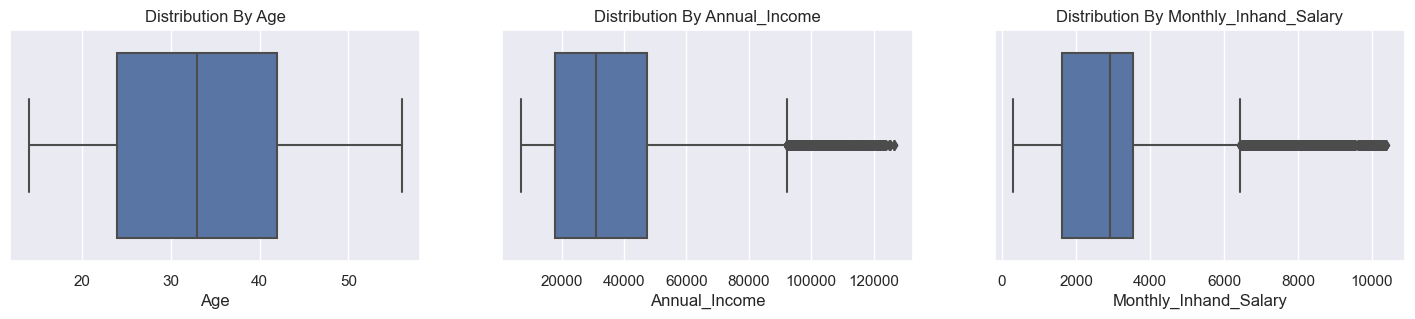

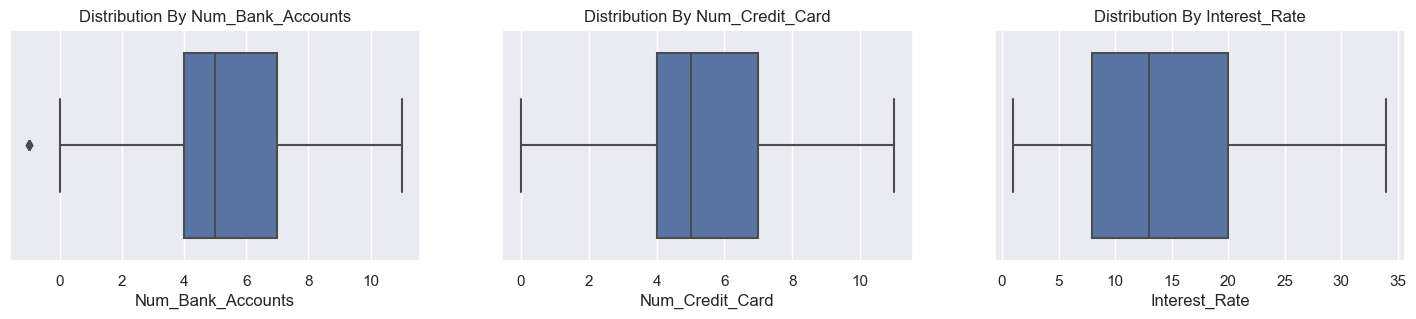

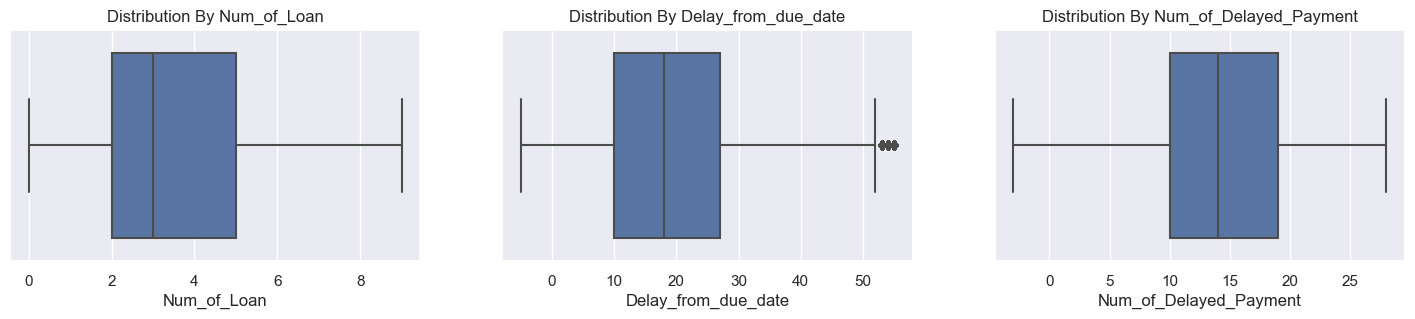

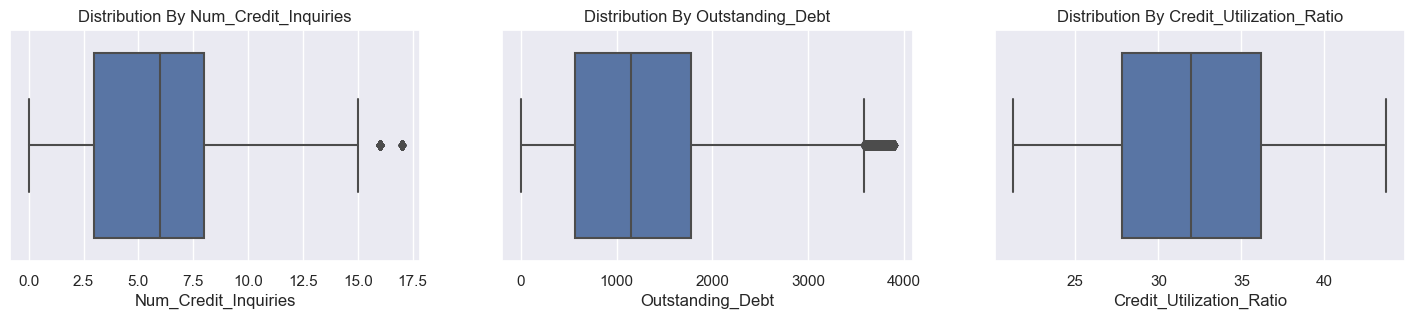

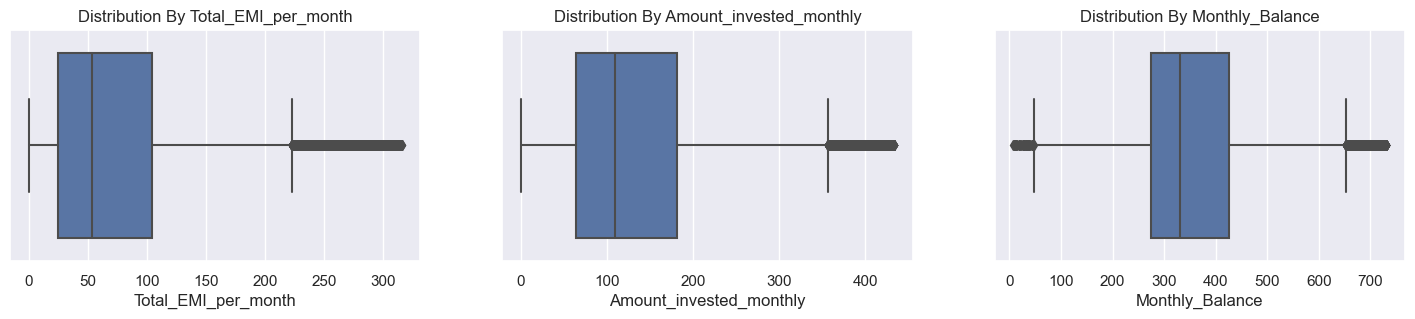

In [27]:

val = []
for x in dat.columns:
    if dat[x].dtype != 'object':
        val.append(x)



def plotter(dfframe, a,b,c):
    sns.set(style = 'darkgrid')
    plt.figure(figsize = (18, 3))
    plt.subplot(1, 3, 1)
    sns.boxplot(x = dat[a])
    plt.title(f'Distribution By {a}')

    plt.subplot(1, 3, 2)
    sns.boxplot(x = dat[b])
    plt.title(f'Distribution By {b}')

    plt.subplot(1, 3, 3)
    sns.boxplot(x = dat[c])
    plt.title(f'Distribution By {c}')

    plt.show()

for v in range(0, len(val), 3):  # Increment by 3 to process three columns at a time
    if v + 2 < len(val):  # Ensure there are at least three columns left to process
        plotter(dat, val[v], val[v + 1], val[v + 2])

In [33]:
cleaned_data = df.merge(dat, on= 'Age',how = 'inner')
cleaned_data

MemoryError: Unable to allocate 767. MiB for an array with shape (1, 100569229) and data type object

In [ ]:
df.describe()

In [31]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,No data,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,3093.745000,3,...,Good,809.98,31.944960,15 Years and 11 Months,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500.0,821-00-0265,Scientist,19114.12,3093.745000,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,3093.745000,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [32]:
dat.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.0,4.0,809.98,26.822620,49.574949,80.415295,312.494089
1,23.0,19114.12,3093.745000,3,4,3,4.0,-1,19.0,4.0,809.98,31.944960,49.574949,118.280222,284.629162
3,23.0,19114.12,3093.745000,3,4,3,4.0,5,4.0,4.0,809.98,31.377862,49.574949,199.458074,223.451310
4,23.0,19114.12,1824.843333,3,4,3,4.0,6,19.0,4.0,809.98,24.797347,49.574949,41.420153,341.489231
5,23.0,19114.12,3093.745000,3,4,3,4.0,8,4.0,4.0,809.98,27.262259,49.574949,62.430172,340.479212
